In [1]:
import requests
import pandas as pd

In [2]:
city = 'wayne2'

In [3]:
df = pd.read_csv('geo_sampling/{0:s}-roads-s5k.csv'.format(city))
#df = df.sample(10)

In [35]:
API_KEY = 'GOOGLE_MAPS_API_KEY'

## Get Google Maps Street View metadata

In [5]:
def gsv_metadata(lat, lon):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon)}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview/metadata', params=data)
    if r.status_code == 200:
        return r.json()
    else:
        print("WARN: No metadata for {0:f},{1:f}".format(lat, lon))
        return None

In [6]:
df['gsv_metadata'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_metadata(r.start_lat, r.start_long), axis=1)

In [7]:
mdf = pd.concat([df, df.gsv_metadata.apply(pd.Series)], axis=1)

In [8]:
mdf[['osm_type', 'start_lat', 'start_long', 'date', 'status', 'pano_id', 'copyright']]

osm_type  start_lat  start_long     date        status  \
0     secondary  42.441909  -83.322163  2016-08            OK   
1     secondary  42.192723  -83.348046  2011-07            OK   
2      tertiary  42.369270  -82.952822  2013-09            OK   
3      tertiary  42.369270  -82.952822  2013-09            OK   
4      tertiary  42.249202  -83.436907  2016-08            OK   
5     secondary  42.424887  -82.929068  2013-09            OK   
6      tertiary  42.401141  -82.957542  2013-09            OK   
7         trunk  42.316505  -83.076997  2014-07            OK   
8         trunk  42.202035  -83.358145  2009-10            OK   
9     secondary  42.450971  -82.873018  2015-10            OK   
10     tertiary  42.406657  -82.945267  2013-09            OK   
11     tertiary  42.403720  -82.952659  2013-09            OK   
12    secondary  42.441309  -83.025713  2013-08            OK   
13    secondary  42.441179  -83.031788  2013-08            OK   
14     tertiary  42.275110  -83.475839  2016-10            OK   
15    secondary  42.398134  -83.481701  2016-10            OK   
16      primary  42.382437  -83.217869  2016-07            OK   
17     tertiary  42.370071  -83.548566  2014-10            OK   
18     tertiary  42.404810  -82.959448  2013-09            OK   
19      primary  42.146018  -83.259717  2013-07            OK   
20     tertiary  42.366672  -83.140537  2016-11            OK   
21    secondary  42.341945  -83.067890  2016-07            OK   
22     tertiary  42.220407  -83.477947  2016-10            OK   
23     tertiary  42.382189  -83.065978  2014-10            OK   
24     tertiary  42.418923  -83.384324      NaN  ZERO_RESULTS   
25     tertiary  42.159164  -83.161555      NaN  ZERO_RESULTS   
26     tertiary  42.137677  -83.170046  2015-09            OK   
27     tertiary  42.327553  -83.527455  2009-10            OK   
28      primary  42.325157  -83.054601  2014-10            OK   
29      primary  42.381361  -83.275523  2016-11            OK   
...         ...        ...         ...      ...           ...   
4970  secondary  42.358942  -83.460787  2016-10            OK   
4971  secondary  42.405064  -82.963224  2013-09            OK   
4972   tertiary  42.315809  -83.116583  2016-10            OK   
4973   tertiary  42.316283  -83.120145  2016-11            OK   
4974  secondary  42.411426  -82.896855  2013-09            OK   
4975   tertiary  42.339338  -83.365508  2016-08            OK   
4976   tertiary  42.326692  -83.287100  2016-10            OK   
4977   tertiary  42.336024  -83.287625  2016-07            OK   
4978   tertiary  42.307396  -83.487831  2016-08            OK   
4979  secondary  42.282117  -83.485962  2016-08            OK   
4980   tertiary  42.300098  -83.147237  2013-09            OK   
4981   tertiary  42.306929  -83.507444  2011-07            OK   
4982   tertiary  42.306939  -83.507103  2011-07            OK   
4983   tertiary  42.306967  -83.505868  2016-08            OK   
4984   tertiary  42.307271  -83.493943  2016-08            OK   
4985   tertiary  42.307387  -83.488657  2016-08            OK   
4986   tertiary  42.307555  -83.482339  2016-08            OK   
4987   tertiary  42.307673  -83.476785  2016-08            OK   
4988   tertiary  42.307697  -83.475416  2016-10            OK   
4989   tertiary  42.307721  -83.473882  2016-10            OK   
4990   tertiary  42.307799  -83.468909  2016-10            OK   
4991   tertiary  42.308041  -83.459652  2016-10            OK   
4992   tertiary  42.308082  -83.457953  2016-10            OK   
4993   tertiary  42.307148  -83.499040  2016-08            OK   
4994  secondary  42.320865  -83.514019  2016-08            OK   
4995  secondary  42.322121  -83.479481  2016-10            OK   
4996  secondary  42.322671  -83.456971  2016-08            OK   
4997  secondary  42.364836  -83.023962  2015-08            OK   
4998  secondary  42.375704  -83.031084  2013-09            OK   
4999   tertiary  42.354037  -83.527962  20

In [9]:
mdf.groupby('date').agg({'status': 'count'})

status
date           
2007-07      10
2007-08       7
2007-09       1
2007-10       1
2008-10      12
2008-11       2
2009-05       6
2009-06       5
2009-07      20
2009-08       4
2009-09       1
2009-10      14
2011-06      15
2011-07     149
2011-08      59
2011-09      50
2011-10      36
2012-07       1
2013-07      79
2013-08     304
2013-09     662
2013-10      20
2014-07       1
2014-10      39
2015-04       1
2015-07     111
2015-08     246
2015-09      36
2015-10      78
2015-11       5
2015-12       1
2016-06      49
2016-07     447
2016-08     507
2016-09     437
2016-10    1159
2016-11     252
2017-06       1

In [10]:
mdf[mdf.status != 'OK']

segment_id     osm_id              osm_name   osm_type  start_lat  \
24            86    8732377             Gill Road   tertiary  42.418923   
25            91    8732409       West River Road   tertiary  42.159164   
194          751    8754730         Ostreich Road   tertiary  42.088578   
195          752    8754730         Ostreich Road   tertiary  42.084394   
247          932    8759347         Hughes Avenue  secondary  42.394446   
254          975    8759347         Hughes Avenue  secondary  42.403705   
256          980    8759347         Hughes Avenue  secondary  42.403454   
261         1002    8759347         Hughes Avenue  secondary  42.385824   
262         1003    8759347         Hughes Avenue  secondary  42.385019   
265         1020    8759347         Hughes Avenue  secondary  42.392130   
266         1021    8759347         Hughes Avenue  secondary  42.392912   
267         1023    8759347         Hughes Avenue  secondary  42.394475   
295         1085    8760826  East Grand Boulevard  secondary  42.379331   
300         1098    8760826  East Grand Boulevard  secondary  42.373395   
310         1137    8761350      North Venoy Road   tertiary  42.333701   
311         1140    8761350      North Venoy Road   tertiary  42.336461   
322         1197    8761350      North Venoy Road   tertiary  42.378515   
332         1222    8761350      North Venoy Road   tertiary  42.356379   
346         1258    8761350      North Venoy Road   tertiary  42.324168   
353         1294    8761915         Harper Avenue  secondary  42.389778   
358         1308    8761915         Harper Avenue  secondary  42.390814   
373         1355    8763108         Harper Avenue    primary  42.424438   
388         1413    8763603            Cowan Road   tertiary  42.351827   
414         1523    8763603            Cowan Road   tertiary  42.347365   
415         1526    8763603            Cowan Road   tertiary  42.345332   
417         1541    8763603            Cowan Road   tertiary  42.345180   
418         1551    8763603            Cowan Road   tertiary  42.351937   
423         1563    8763603            Cowan Road   tertiary  42.360003   
433         1587    8763603            Cowan Road   tertiary  42.376002   
441         1617    8763603            Cowan Road   tertiary  42.376615   
...          ...        ...                   ...        ...        ...   
3116       11532  422055121         Harper Avenue  secondary  42.391403   
3264       12098  442400183          Village Road   tertiary  42.296368   
3265       12100  442400185          Village Road   tertiary  42.299471   
3267       12109  442400194          Village Road   tertiary  42.295524   
3619       13351  498573163      West 7 Mile Road  secondary  42.399375   
3625       13373  498573163      West 7 Mile Road  secondary  42.388472   
3629       13394  498573163      West 7 Mile Road  secondary  42.408586   
3681       13576  499004713       Middlebelt Road  secondary  42.373093   
3698       13647  499004713       Middlebelt Road  secondary  42.363660   
3699       13648  499004713       Middlebelt Road  secondary  42.363326   
3724       13725  499309311     Oakwood Boulevard  secondary  42.292061   
3726       13727  499309311     Oakwood Boulevard  secondary  42.295973   
3727       13730  499309311     Oakwood Boulevard  secondary  42.301840   
3728       13739  499309311     Oakwood Boulevard  secondary  42.319426   
3729       13743  499309311     Oakwood Boulevard  secondary  42.327235   
3734       13767  499309311     Oakwood Boulevard  secondary  42.374007   
3834       14137  500971306        Tireman Avenue   tertiary  42.356843   
3841       14160  500971306        Tireman Avenue   tertiary  42.381148   
3850       14192  500971306        Tireman Avenue   tertiary  42.356984   
3875       14258  501465336      Livernois Avenue   tertiary  42.385287   
3876       14259  501465336      Livernois Avenue   tertiary  42.386157   
3877       14260  501465336    

In [11]:
df = mdf[mdf.status == 'OK'].copy()

## % Coverage

In [19]:
len(df) * 100.0 / len(mdf)

96.56

## Get Google Maps Street View Image

In [5]:
from base64 import b64encode, b64decode

def gsv_image(lat, lon, heading=0, pitch=0, size='640x640'):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon),
                'heading': '{0:d}'.format(heading),
                'pitch': '{0:d}'.format(pitch),
                'size': size}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview', params=data)
    if r.status_code == 200:
        return b64encode(r.content)
    else:
        print(r.status_code)
        print(r.url)
        #print(r.text)
        print("WARN: No image data for {0:f},{1:f}".format(lat, lon))
        return None

In [ ]:
df['img0'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 0, -15), axis=1)

In [ ]:
df['img90'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 90, -15), axis=1)

In [ ]:
df['img180'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 180, -15), axis=1)

In [ ]:
df['img270'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 270, -15), axis=1)

In [43]:
df.loc[df.img270.isnull(), 'img270'] = df.loc[df.img270.isnull(), ['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 270, -15), axis=1)

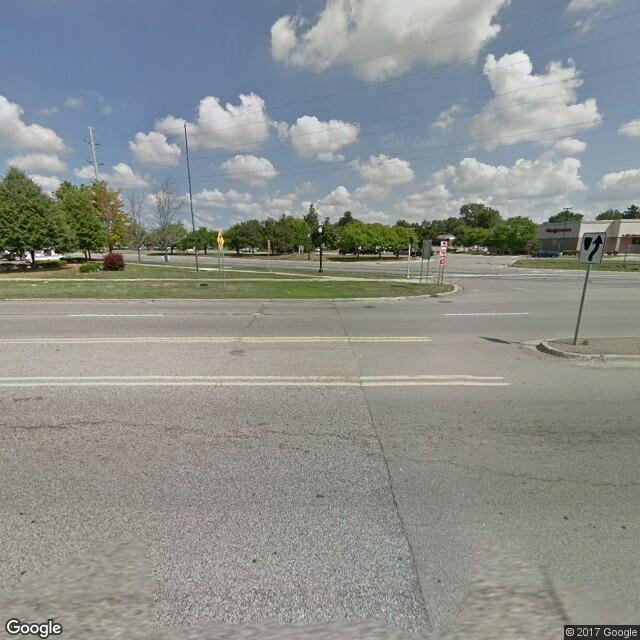

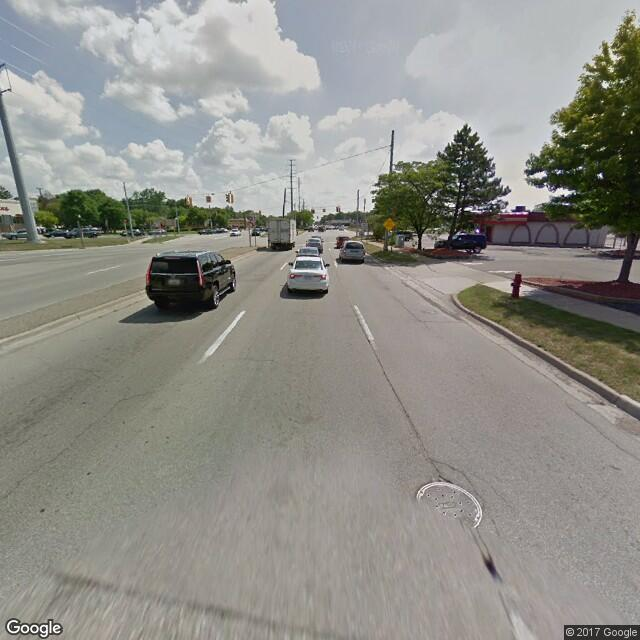

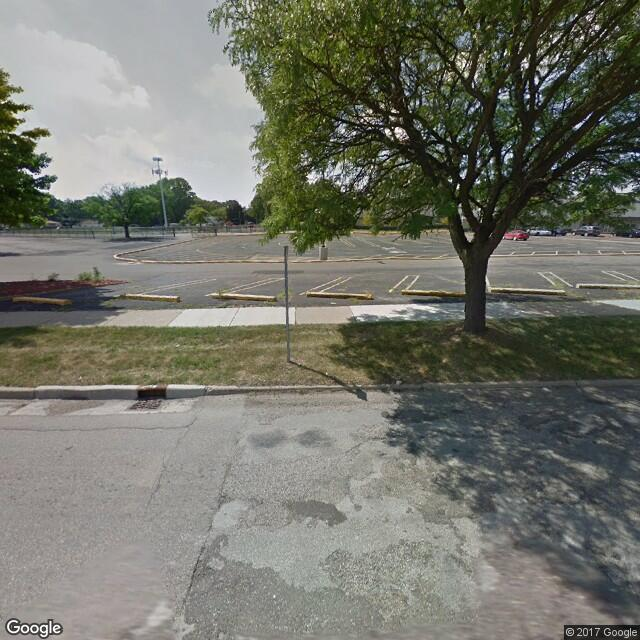

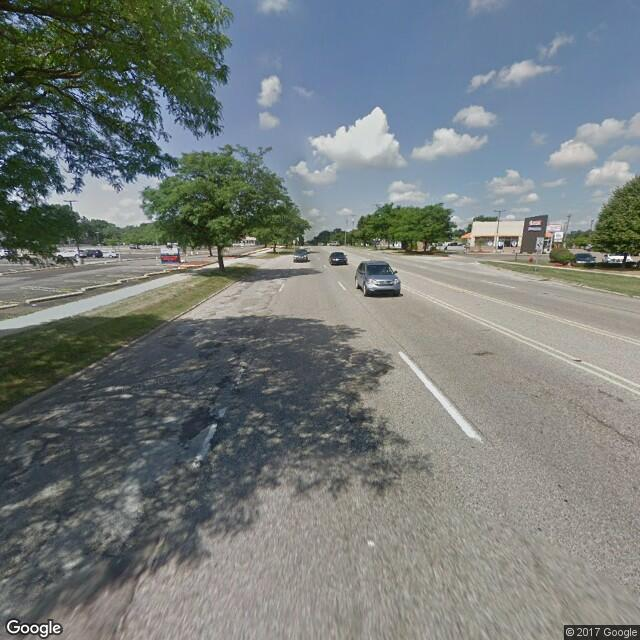

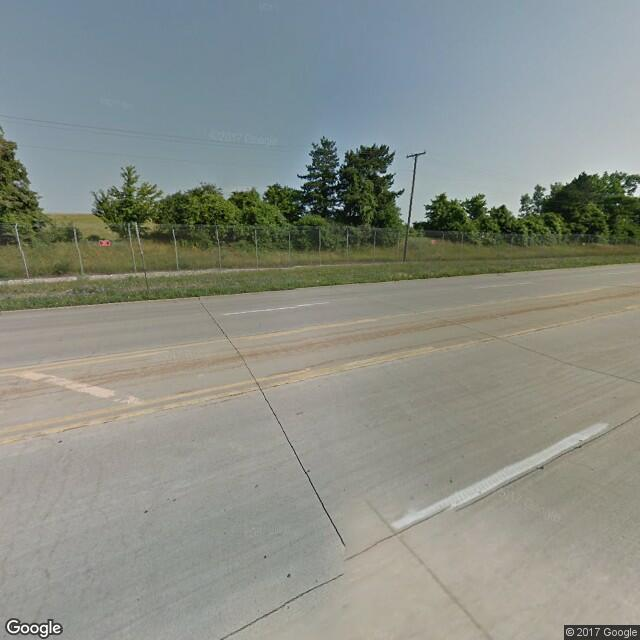

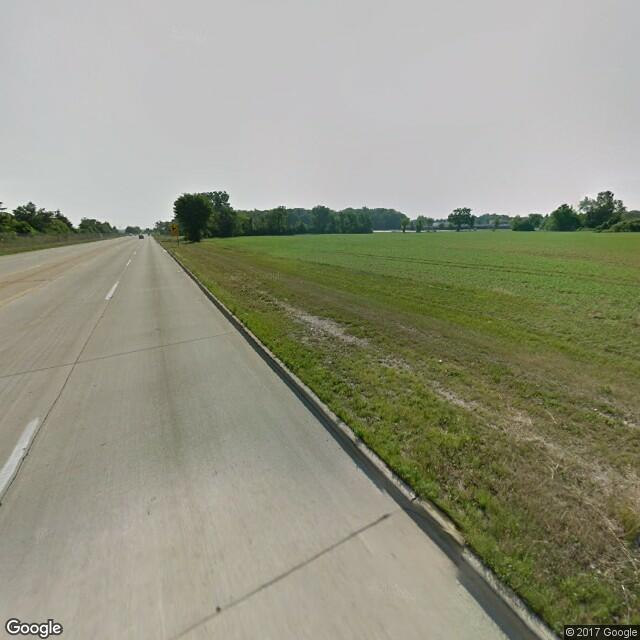

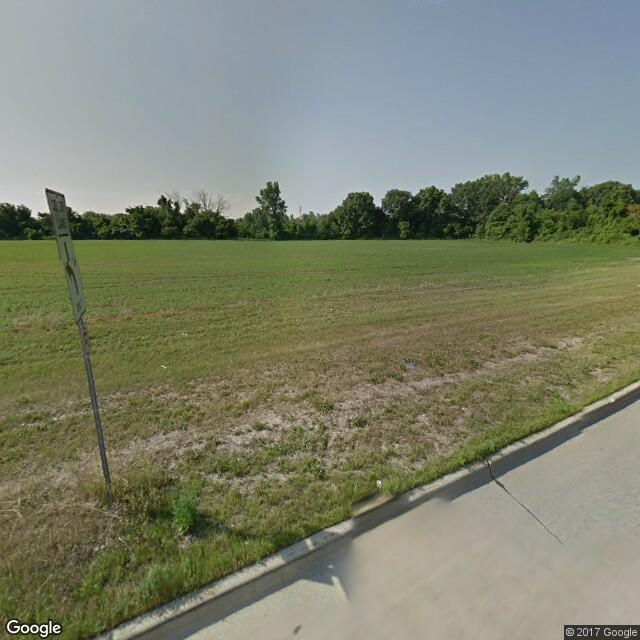

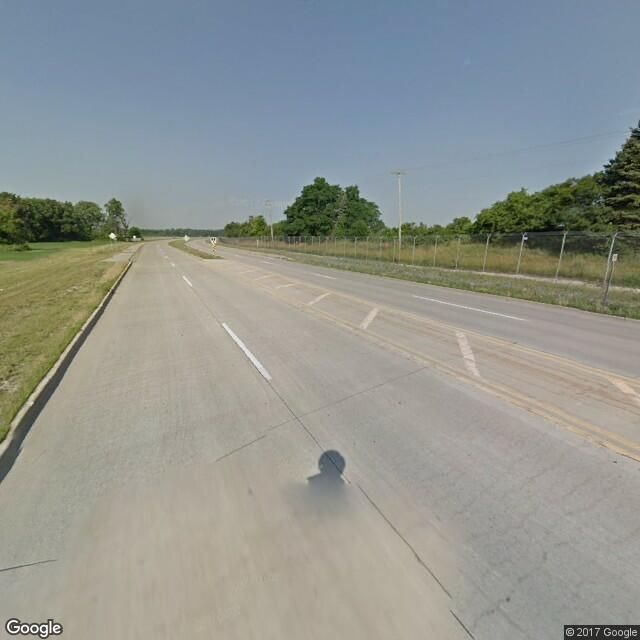

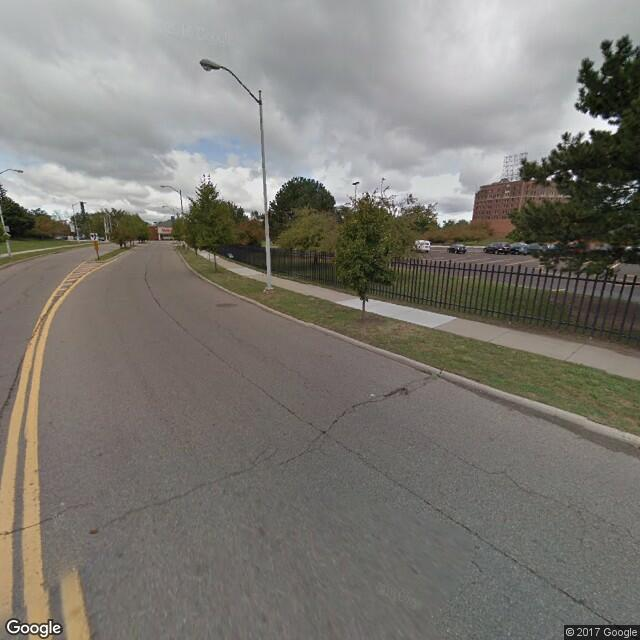

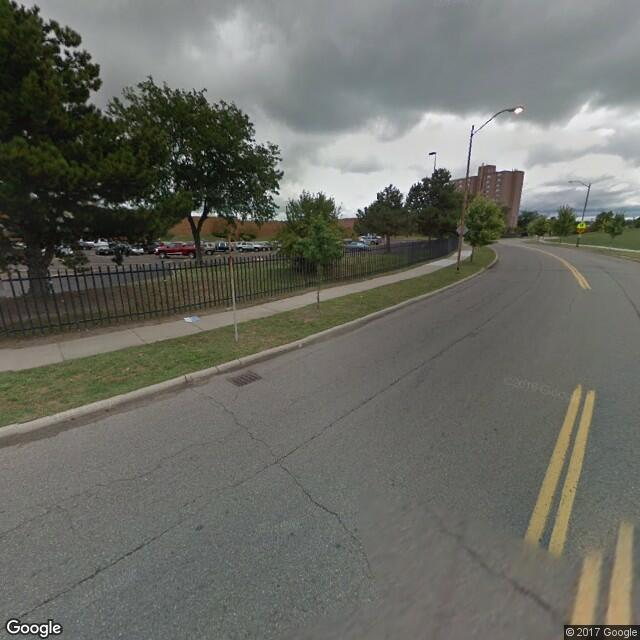

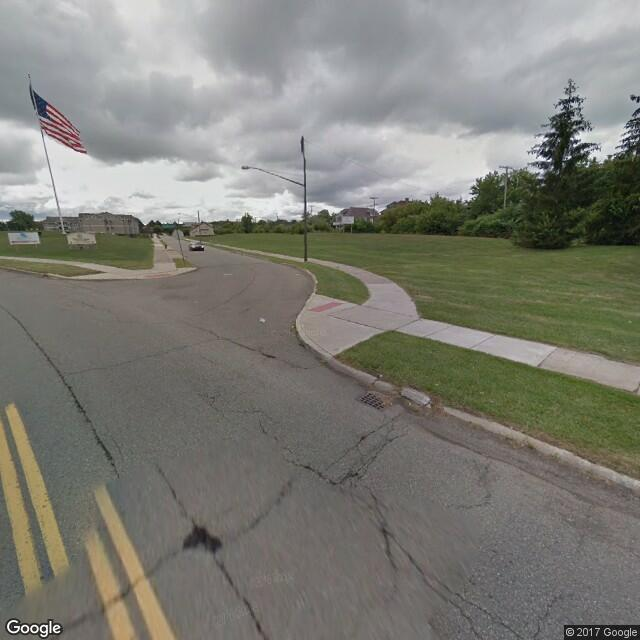

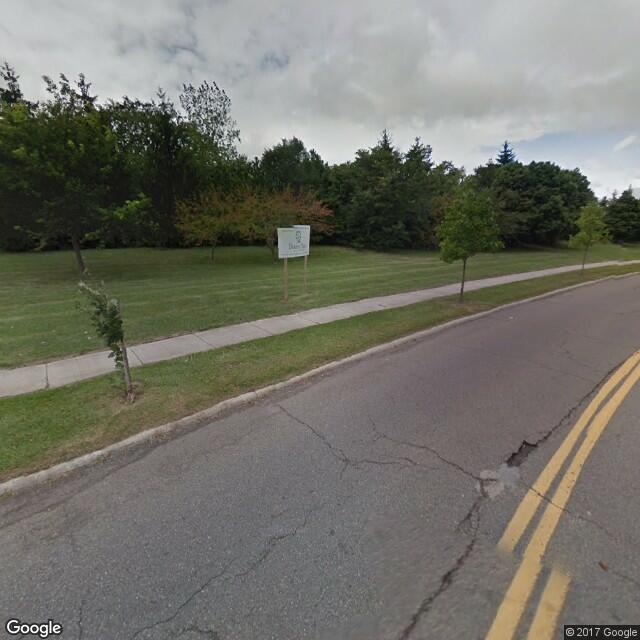

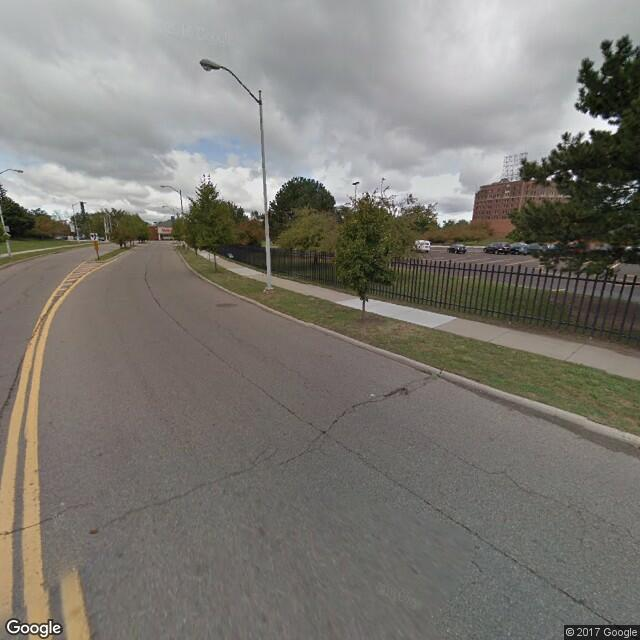

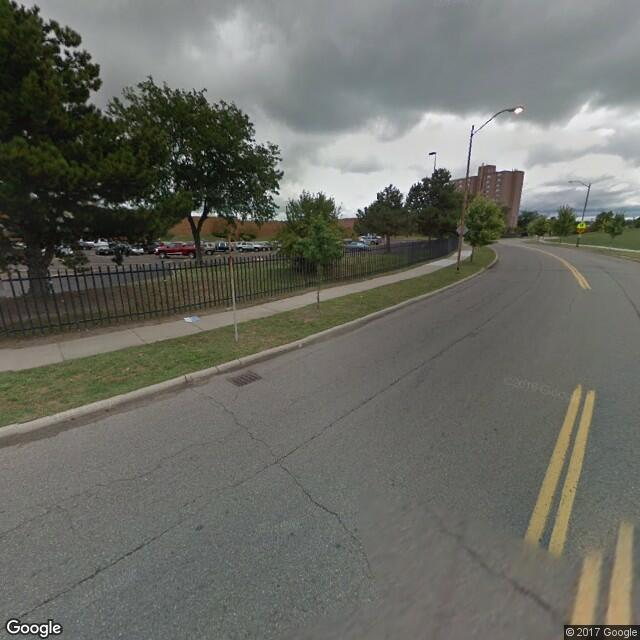

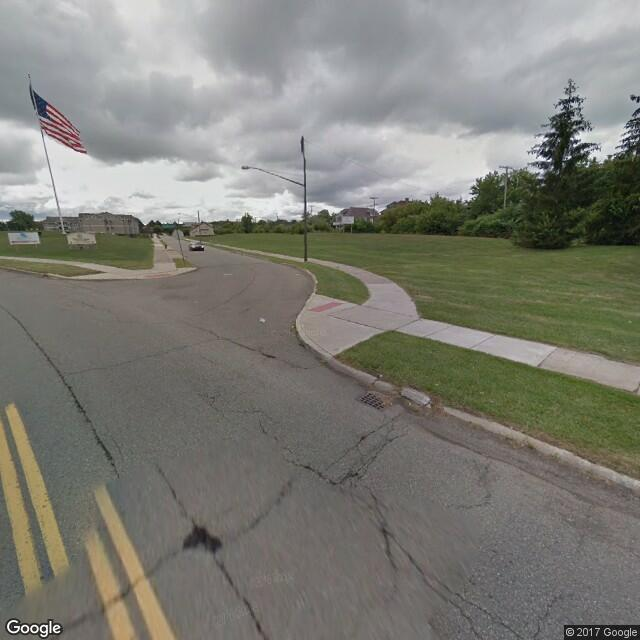

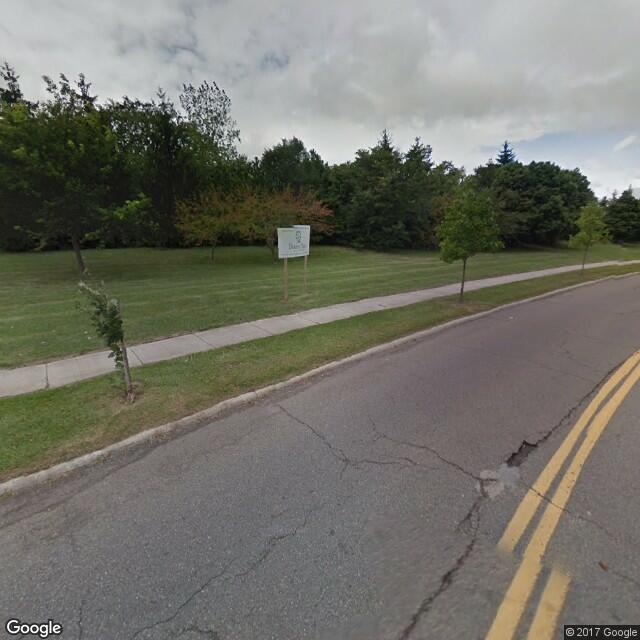

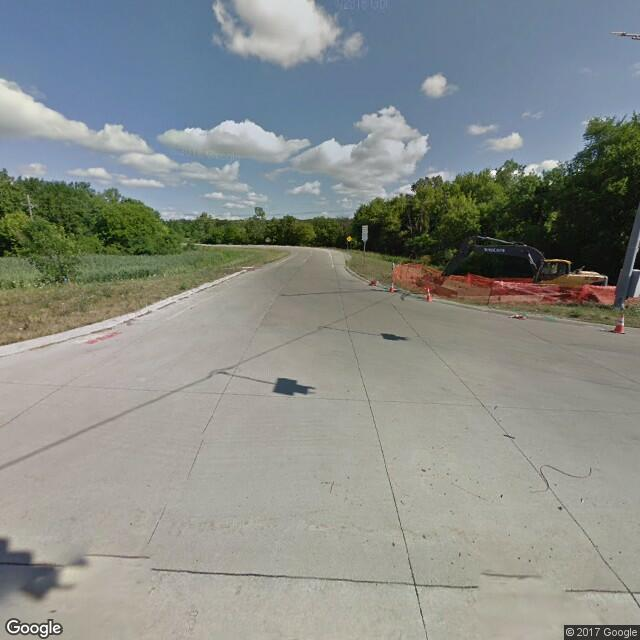

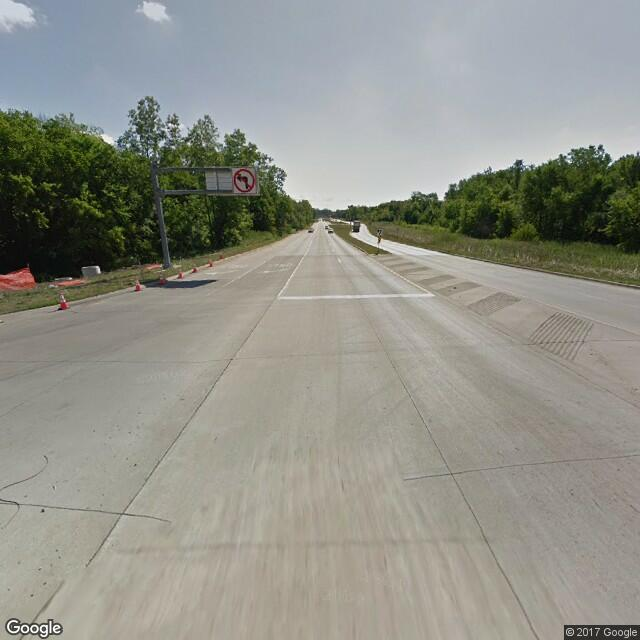

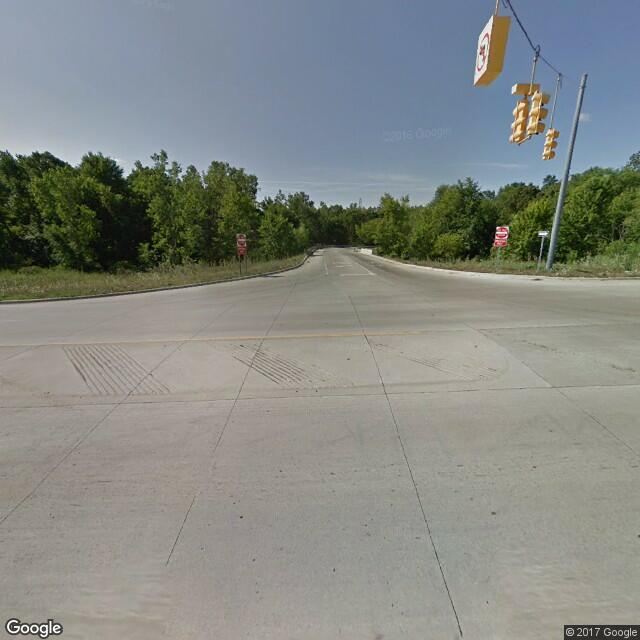

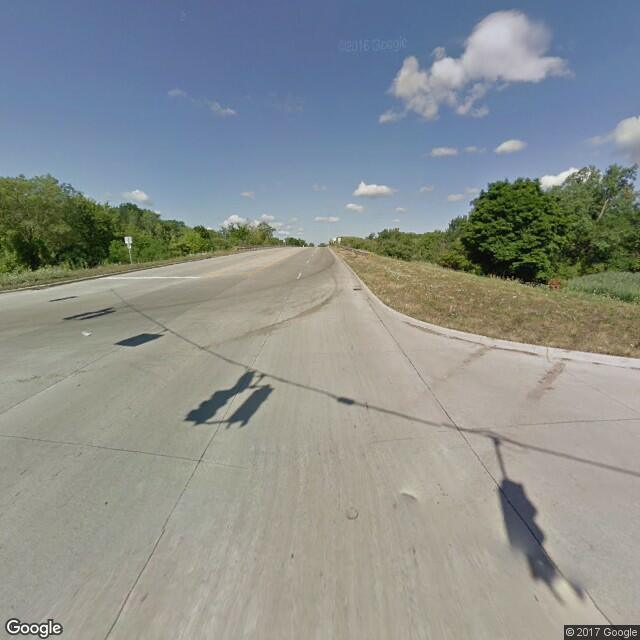

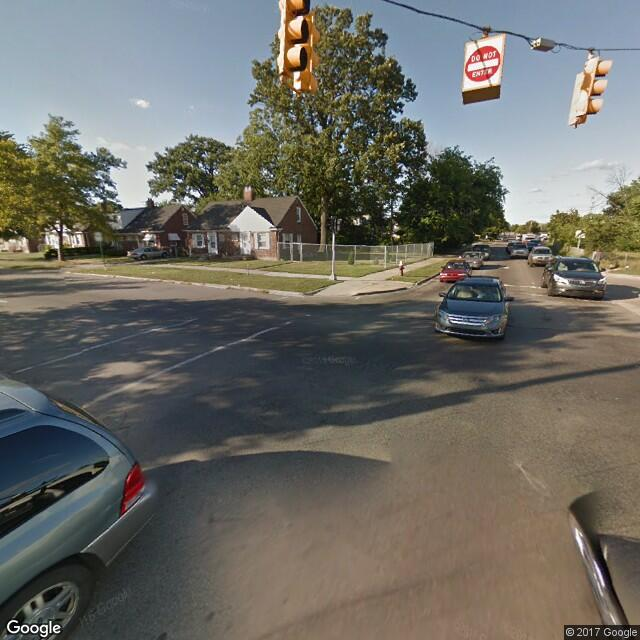

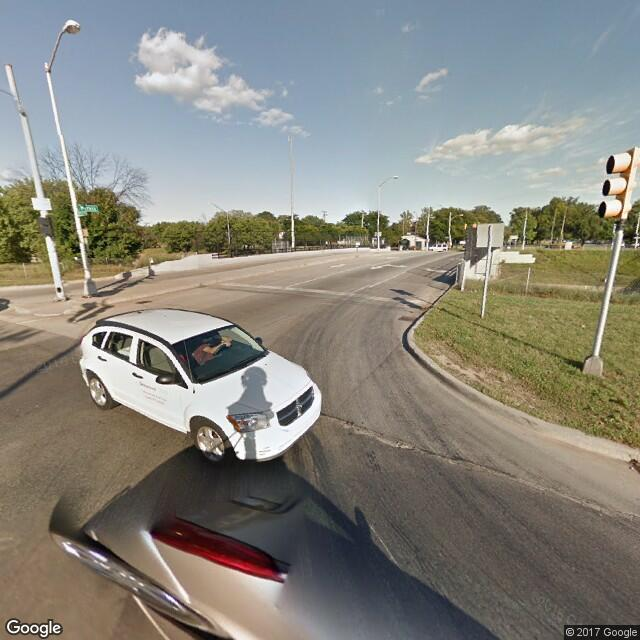

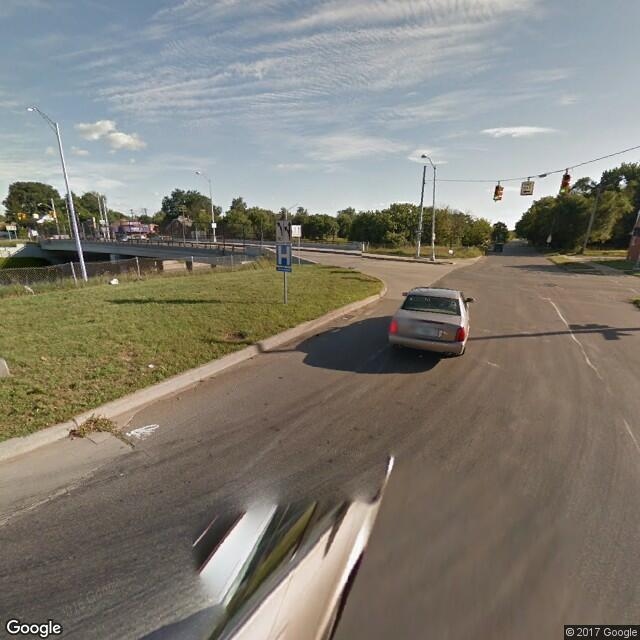

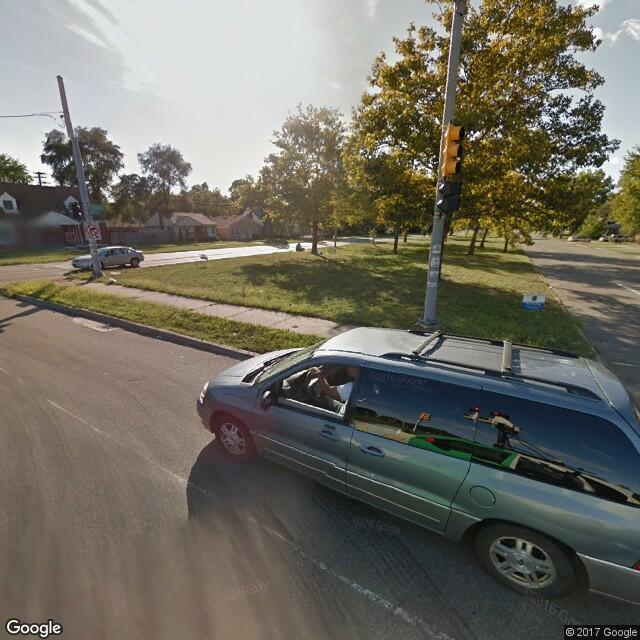

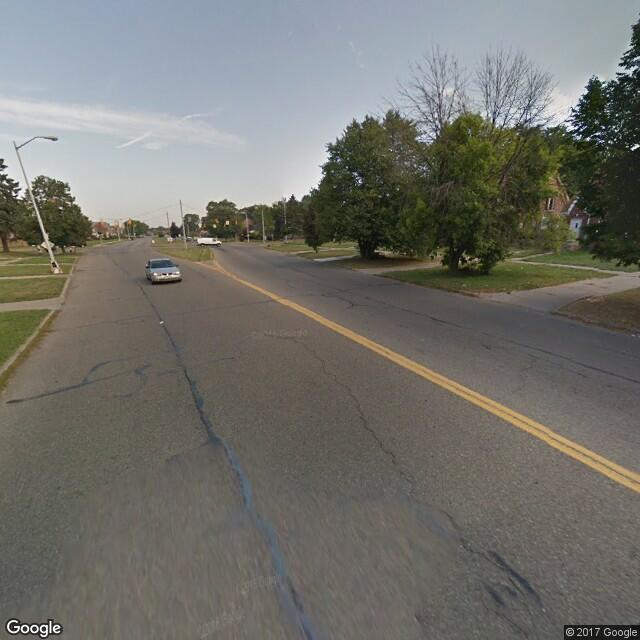

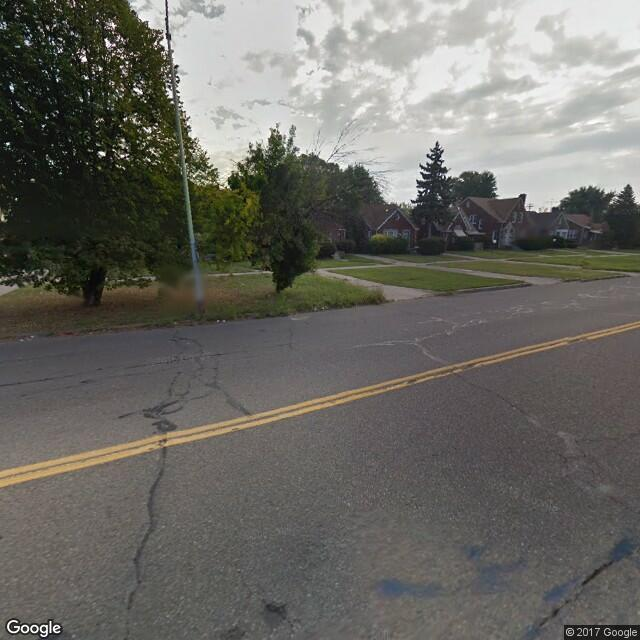

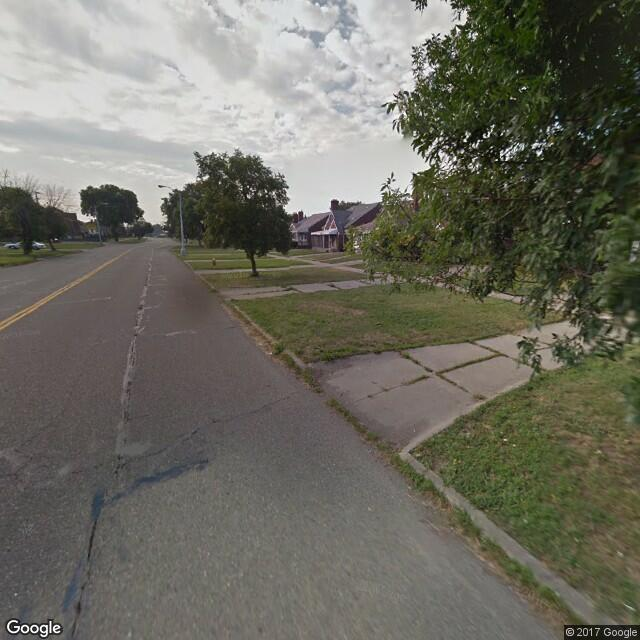

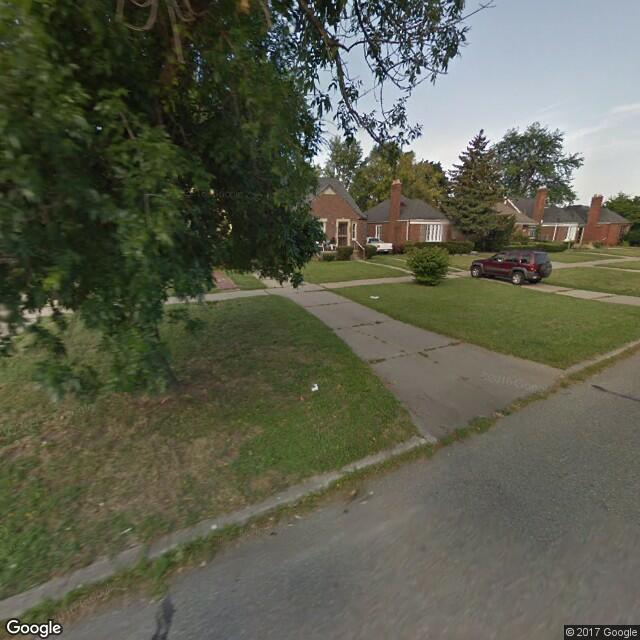

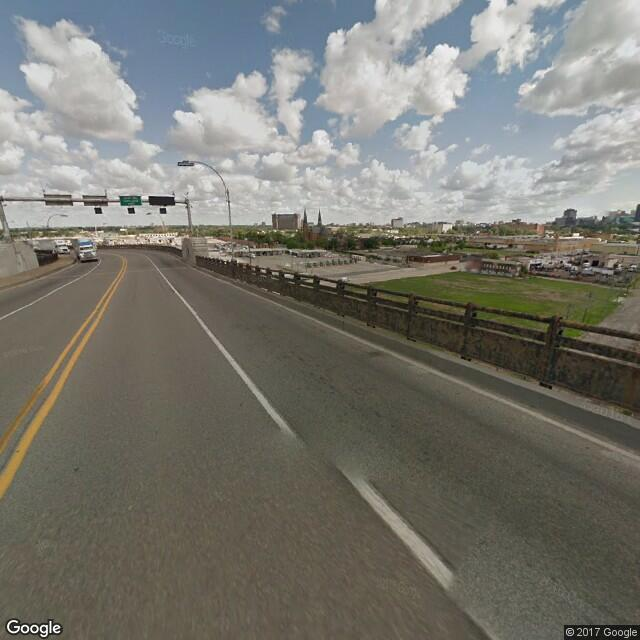

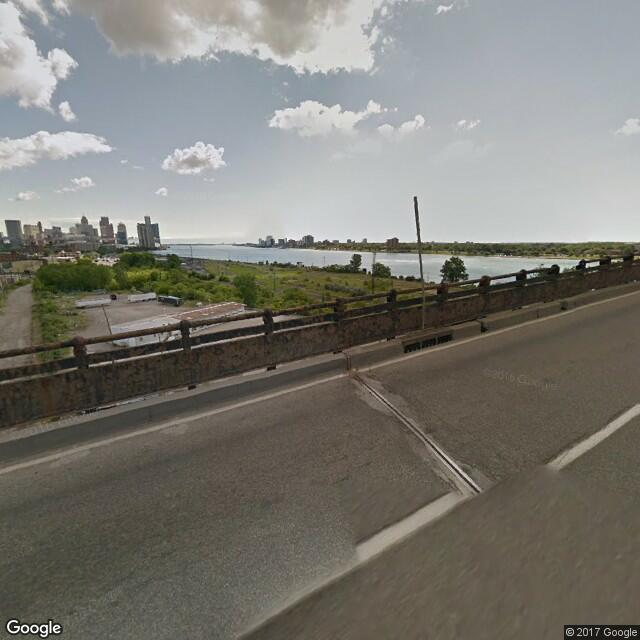

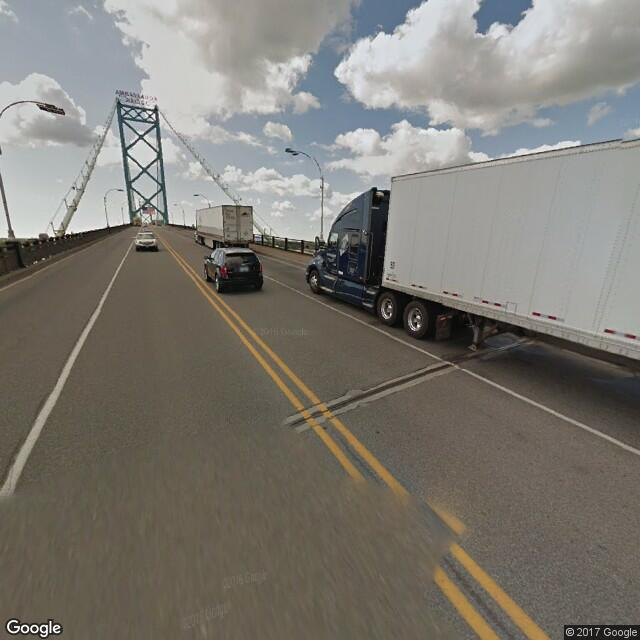

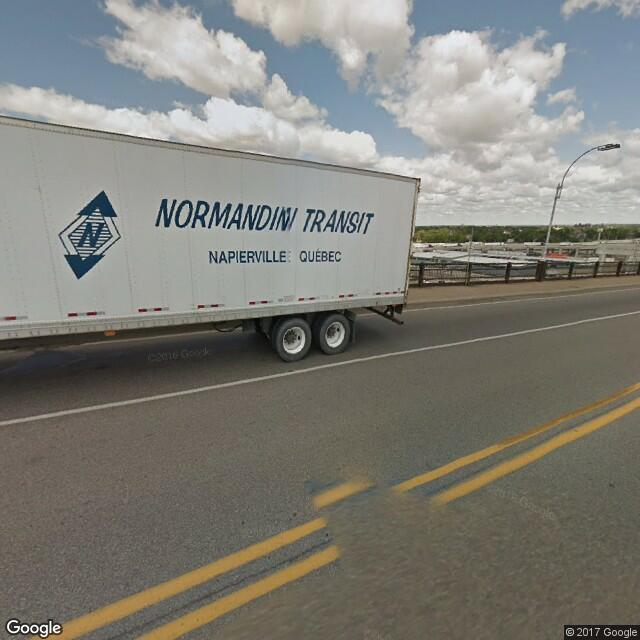

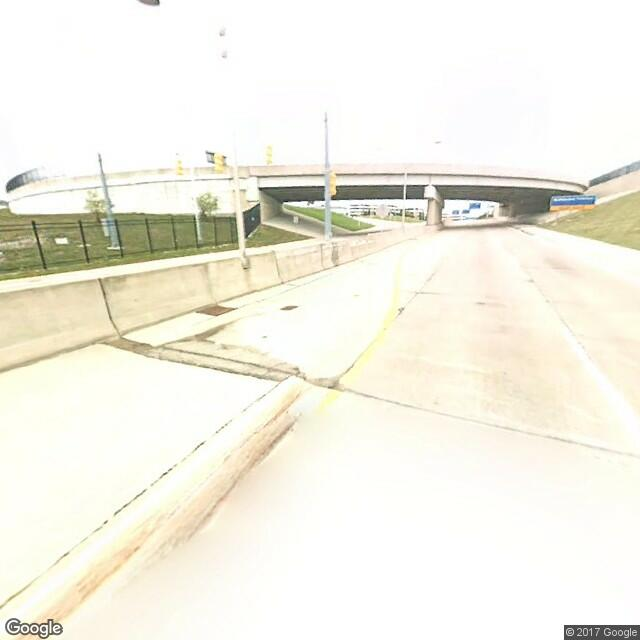

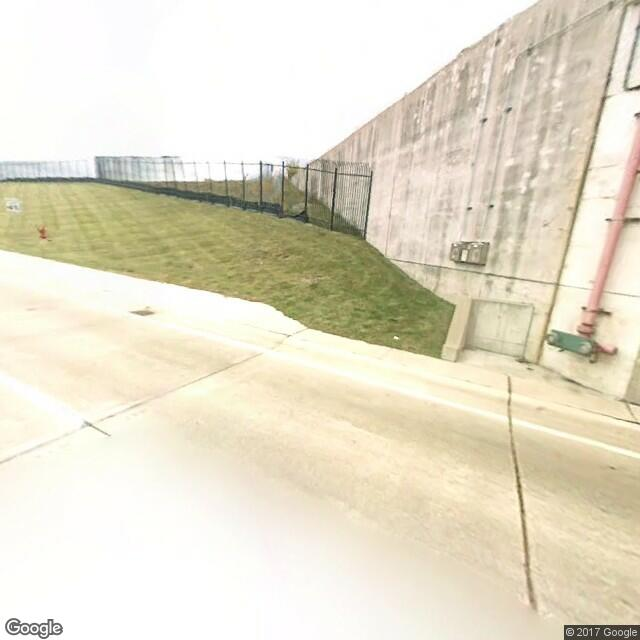

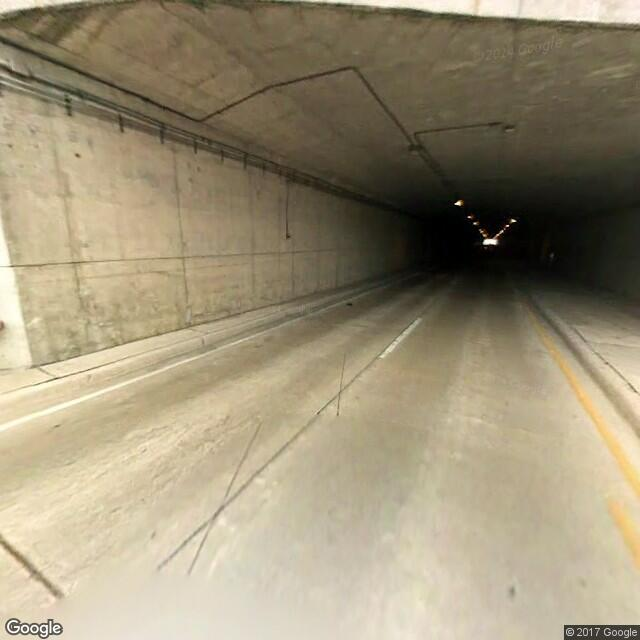

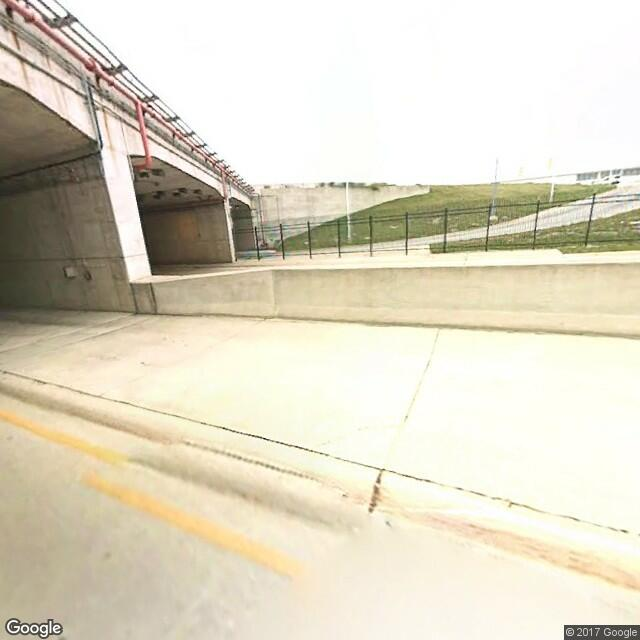

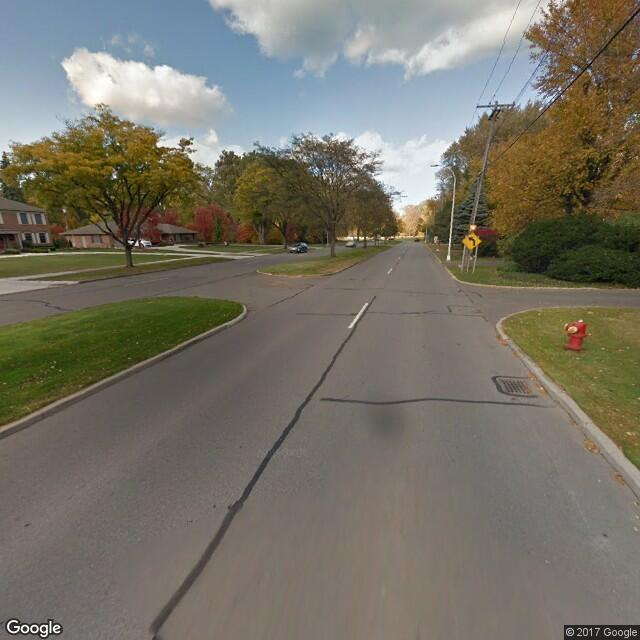

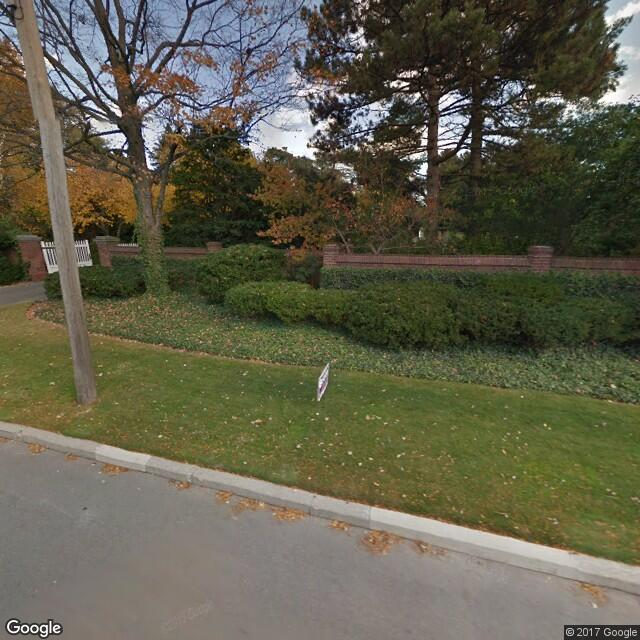

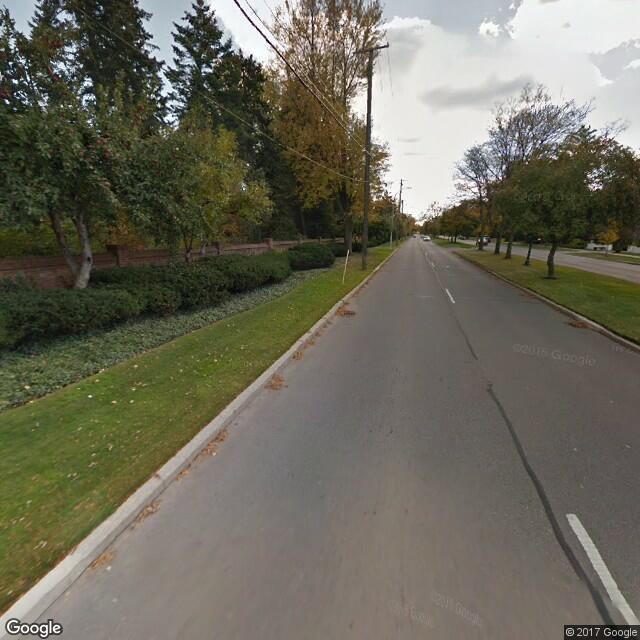

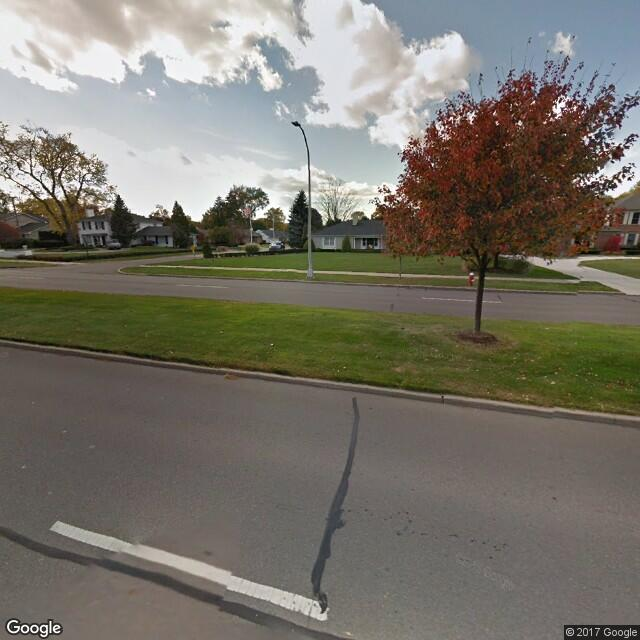

In [44]:
#from ipywidgets import Image
from IPython.display import Image
from IPython.display import display

imgs = ['img0', 'img90', 'img180', 'img270']
images = []
for row in df[imgs].itertuples(index=False):
    for i in xrange(len(imgs)):
        img = Image(data=b64decode(row[i]), width="640px")
        images.append(img)

display(*images[:10*4])

## Subplot

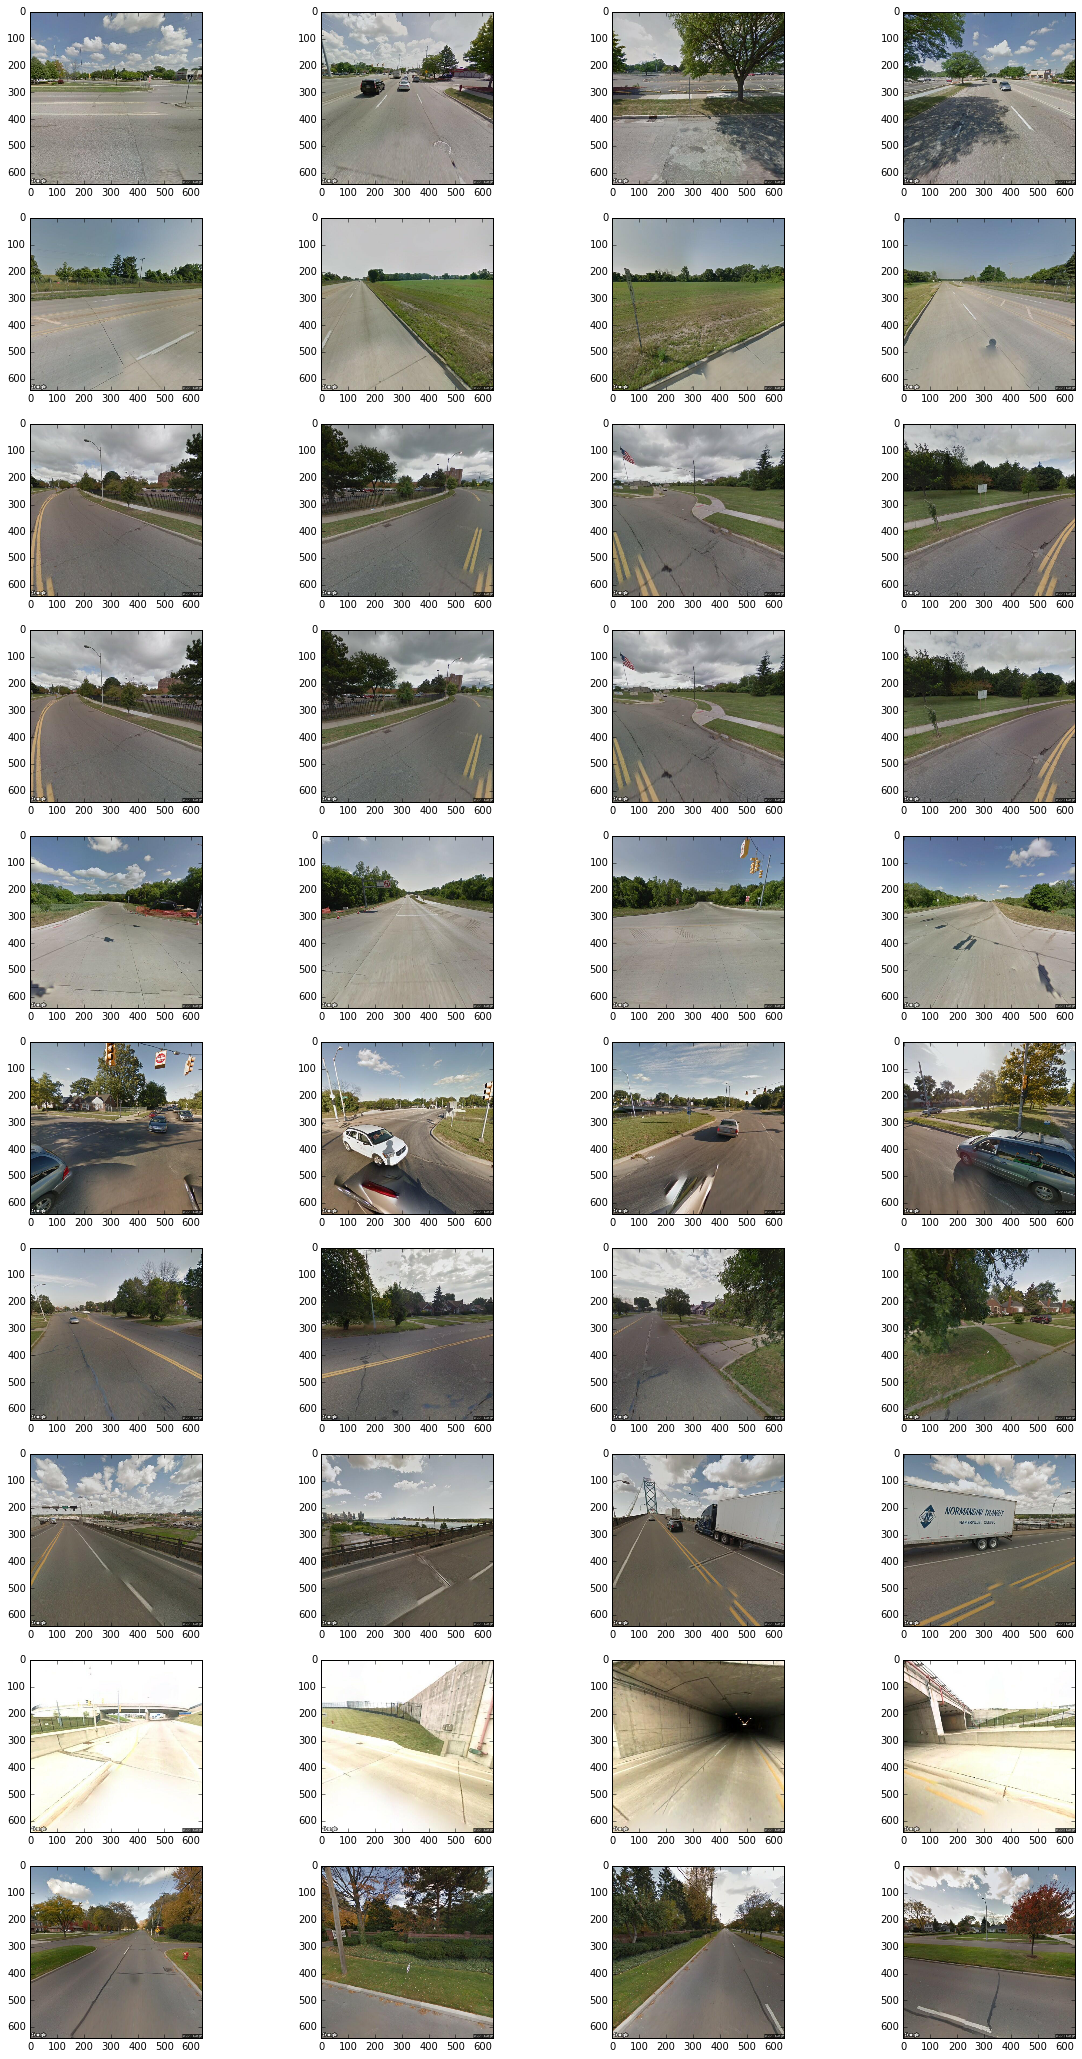

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as PILImage
from cStringIO import StringIO

plotimages = images[:4*10]
plt.figure(figsize=(20, 40))
columns = 4
for i, image in enumerate(plotimages):
    plt.subplot(len(plotimages) / columns + 1, columns, i + 1)
    img = PILImage.open(StringIO(image.data))
    plt.imshow(img)


## Export Data for Mturk

In [46]:
df.to_csv('{0:s}-roads-gsv.csv.gz'.format(city), index_label='id', encoding='utf-8', compression='gzip')
del df

In [3]:
def export_image_to_file(i, data, basename):
    url = '{0:s}{1:04d}.jpg'.format(basename, i)
    with open('mturk/' + url, 'wb') as f:
        raw = b64decode(data)
        f.write(raw)
    return url

In [8]:
adf = None
i = 0
for rdf in pd.read_csv('{0:s}-roads-gsv.csv.gz'.format(city), chunksize=1000):
    rdf['url_img0'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img0, '{0:s}/img0_'.format(city)), axis=1)
    rdf['url_img90'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img90, '{0:s}/img90_'.format(city)), axis=1)
    rdf['url_img180'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img180, '{0:s}/img180_'.format(city)), axis=1)
    rdf['url_img270'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img270, '{0:s}/img270_'.format(city)), axis=1)
    del rdf['img0']
    del rdf['img90']
    del rdf['img180']
    del rdf['img270']
    if adf is None:
        adf = rdf
    else:
        adf = pd.concat([adf, rdf])
    i += 1
    print i
    #if i > 5:
    #    break

1
2
3
4
5


In [9]:
adf.to_csv('mturk/{0:s}.csv'.format(city), index=False)